# Mars Data Challenge: Part 2

In [24]:
# Set up dependencies

from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import requests
import pymongo
import matplotlib.pyplot as plt
import numpy as np
from flask import Flask, render_template, redirect

In [14]:
# Set up executable path

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [15]:
# Set up BeautifulSoup for redplanetscience.com

# URL to be scraped

url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

# Open URL

browser.visit(url)

# Grab HTML

url_html = browser.html

# Create BeautifulSoup object with parser

soup = BeautifulSoup(url_html, 'html.parser')

In [16]:
tables = pd.read_html(url_html)
mars_facts = tables[0]
mars_facts

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### How many months exist on Mars?

In [17]:
len(mars_facts['month'].unique())

12

### How many martian (and not Earth) days worth of data exist in the scraped dataset?

In [18]:
len(mars_facts['terrestrial_date'].unique())

1867

### What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

In [19]:
months_df = mars_facts.groupby('month').mean()
months_df

/var/folders/6c/qgxdx_5970j5g3kfngnfbp0w0000gn/T/ipykernel_6753/1670765484.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  months_df = mars_facts.groupby('month').mean()


,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


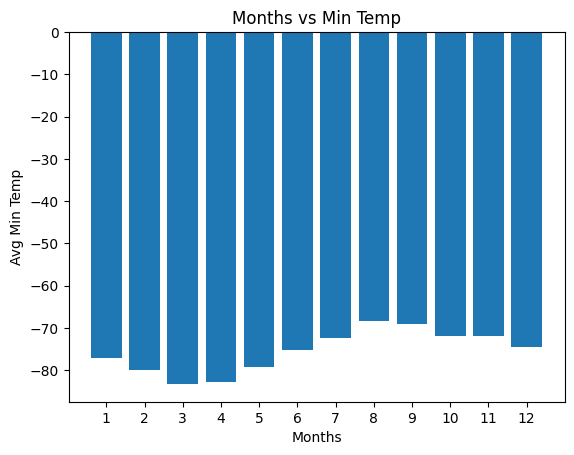

In [25]:
months = np.arange(1, 13, 1)

x = months
y = months_df['min_temp']

plt.bar(x, y)
plt.title('Months vs Min Temp')
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Avg Min Temp")
plt.show()

### Which months have the lowest and the highest atmospheric pressure on Mars?

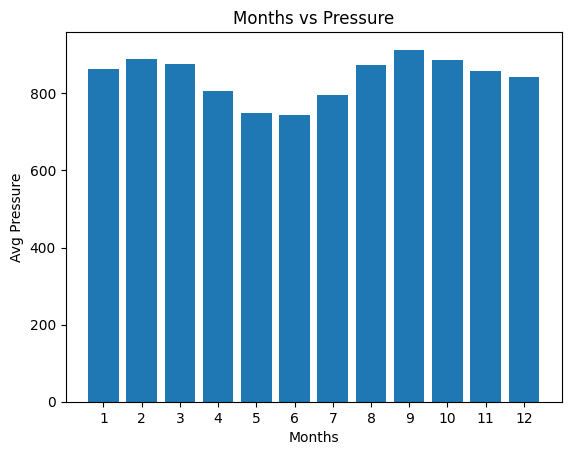

In [27]:
months = np.arange(1, 13, 1)

x = months
y = months_df['pressure']

plt.bar(x, y)
plt.title('Months vs Pressure')
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Avg Pressure")
plt.show()

In [29]:
mars_facts.to_csv('mission_to_mars/web-scraping-challenge')